## IS6 in Python: Paired Samples and Blocks (Chapter 18)

### Introduction and background

This document is intended to assist students in undertaking examples shown in the Sixth Edition of Intro Stats (2022) by De Veaux, Velleman, and Bock. This pdf file as well as the associated ipynb reproducible analysis source file used to create it can be found at (INSERT WEBSITE LINK HERE).

#### Chapter 18: Paired Sampels and Blocks

In [105]:
#Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_rel, t, sem

In [91]:
#Dexterity table
dex = pd.read_csv("datasets/dexterity.txt", sep = "\t")
dex[["Age(months)", "Dominant.1", "Non-dominant", "Gender"]].head(7)

,Age(months),Dominant.1,Non-dominant,Gender
0,117.0,0.353357,0.216245,male
1,101.0,0.257193,0.343495,male
2,135.0,0.536553,0.497358,male
3,119.0,0.443705,0.496124,male
4,124.0,0.482800,0.388067,female
5,127.0,0.523903,0.421718,female
6,101.0,0.455063,0.380862,male


#### Section 18.1: Paired Data

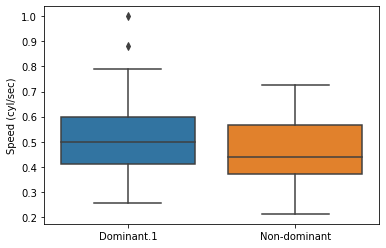

In [92]:
#Figure 18.1
sns.boxplot(data = dex[["Dominant.1", "Non-dominant"]])
plt.ylabel("Speed (cyl/sec)")
plt.show()

#### Example 18.1: Identifying Paired Data

In [93]:
#Make dataset
work = pd.DataFrame({"Name" : ["Jeff", "Betty", "Roger", "Tom", "Aimee", "Greg", "Larry G.", "Tad", "Larry M.", "Leslie", "Lee"],
                     "5-Day Mileage" : [2798, 7724, 7505, 838, 4592, 8107, 1228, 8718, 1097, 8089, 3807],
                     "4-Day Mileage" : [2914, 6112, 6177, 1102, 3281, 4997, 1695, 6606, 1063, 6392, 3362]
                    })
work

,Name,5-Day Mileage,4-Day Mileage
0,Jeff,2798,2914
1,Betty,7724,6112
2,Roger,7505,6177
3,Tom,838,1102
4,Aimee,4592,3281
5,Greg,8107,4997
6,Larry G.,1228,1695
7,Tad,8718,6606
8,Larry M.,1097,1063
9,Leslie,8089,6392


In [94]:
#Looking at pairwise differences in Dexterity
dex = dex.assign(difference = dex["Dominant.1"] - dex["Non-dominant"])

dex[["Dominant.1", "Non-dominant", "difference"]]

,Dominant.1,Non-dominant,difference
0,0.353357,0.216245,0.137111
1,0.257193,0.343495,-0.086302
2,0.536553,0.497358,0.039195
3,0.443705,0.496124,-0.052419
4,0.482800,0.388067,0.094733
...,...,...,...
88,0.532623,0.499220,0.033403
89,0.551344,0.602183,-0.050839
90,0.457143,0.443582,0.013561
91,0.666112,0.592593,0.073519


#### Section 18.2: The Paired t-Test
#### Example 18.2: Checking Assumptions and Conditions

In [95]:
work = work.assign(difference = work["5-Day Mileage"] - work["4-Day Mileage"])
work

,Name,5-Day Mileage,4-Day Mileage,difference
0,Jeff,2798,2914,-116
1,Betty,7724,6112,1612
2,Roger,7505,6177,1328
3,Tom,838,1102,-264
4,Aimee,4592,3281,1311
5,Greg,8107,4997,3110
6,Larry G.,1228,1695,-467
7,Tad,8718,6606,2112
8,Larry M.,1097,1063,34
9,Leslie,8089,6392,1697


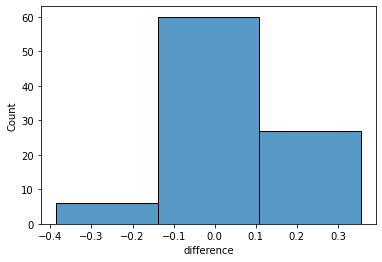

In [96]:
sns.histplot(data = dex, x = "difference", bins = 3)
plt.show()

#### Example 18.3: Doing a Paired t-Test

p-values: 0.017014128345518967
t-test: 2.8580344256037042


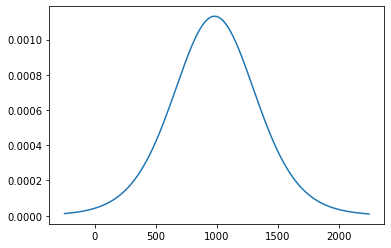

In [97]:
stat, p = ttest_rel(work["5-Day Mileage"], work["4-Day Mileage"])

# Display the results
print("p-values:", p)
print("t-test:", stat)

x_axis = np.arange(-250,2250,1)
plt.plot(x_axis, t.pdf(x_axis, 10, loc  = 982, scale = 343.6))
plt.show()

Question:
- Needs to double check the pdf plot
- is scale the standard deviation or the standard error?

#### Section 18.3: Confidence Intervals for Matched Pairs

In [98]:
couple = pd.read_csv("datasets/couples.txt", sep = "\t")
couple = couple[couple["wAge"] != "*"].dropna()
couple["wAge"] = couple["wAge"].astype("int64")
couple = couple.assign(difference = couple["hAge"] - couple["wAge"])
couple.head(7)

,Names,wAge,hAge,wHeight,hHeight,difference
0,John and Judy,43,49.0,1590.0,1809.0,6.0
1,Carl and Kathryn,28,25.0,1560.0,1841.0,-3.0
2,Craig and Jackie,30,40.0,1620.0,1659.0,10.0
3,Larry and Susan,57,52.0,1540.0,1779.0,-5.0
4,Scott and Susan,52,58.0,1420.0,1616.0,6.0
5,John and Margaret,27,32.0,1660.0,1695.0,5.0
6,Stanley and Patricia,52,43.0,1610.0,1730.0,-9.0


#### Step-By-Step Example: A Paired t-Interval

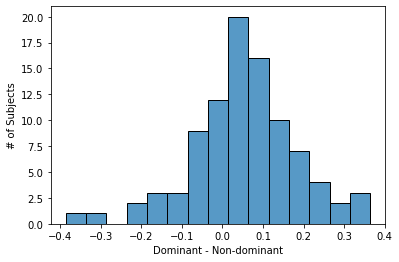

In [99]:
sns.histplot(data = dex, x = "difference", binwidth = 0.05)
plt.xlabel("Dominant - Non-dominant")
plt.ylabel("# of Subjects")
plt.show()

In [100]:
print(dex["difference"].describe())

count    93.000000
mean      0.054201
std       0.131801
min      -0.385965
25%      -0.000849
50%       0.053223
75%       0.125380
max       0.355010
Name: difference, dtype: float64


In [106]:
stat, p = ttest_rel(dex["Dominant.1"], dex["Non-dominant"])

# Display the results
print("p-values:", p)
print("t-test:", stat)

#Calculate confidence interval
conf_int = t.interval(alpha = 0.95, loc = np.mean(dex["difference"]), df = len(dex) - 1, scale = sem(dex["difference"]))
print(conf_int)

p-values: 0.00014458680421271496
t-test: 3.9657878580824373
(0.02705690524208383, 0.08134523927404524)


Note: To calculate the confidence interval of the difference between 2 dependent samples, we need the following:
- alpha: confident percent
- loc: The mean of the differences
- df: number of observations - 1
- scale: standard error. Use stats.sem() to calculate

#### Effect Size
#### Example 18.4: Looking at Effect Size with a Paired t Confidence Interval

In [108]:
#Calculate confidence interval
conf_int = t.interval(alpha = 0.95, loc = np.mean(work["difference"]), df = len(work) - 1, scale = sem(work["difference"]))
print(conf_int)

(216.42757266039916, 1747.5724273396008)


#### Section 18.4: Blocking
#### What's Independent?

Note: The Random Matters section has been removed from this version